# 14章统计模型

In [3]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
import patsy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

In [9]:
y = np.array([1, 2, 3, 4, 5])
In [10]: x1 = np.array([6, 7, 8, 9, 10])
In [11]: x2 = np.array([11, 12, 13, 14, 15])
In [12]: X = np.vstack([np.ones(5), x1, x2, x1*x2]).T
X

array([[  1.,   6.,  11.,  66.],
       [  1.,   7.,  12.,  84.],
       [  1.,   8.,  13., 104.],
       [  1.,   9.,  14., 126.],
       [  1.,  10.,  15., 150.]])

In [10]:
beta, res, rank, sval = np.linalg.lstsq(X, y)
beta

D:\aaaaaaa\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


array([-5.55555556e-01,  1.88888889e+00, -8.88888889e-01, -8.88178420e-16])

In [11]:
data = {"y": y, "x1": x1, "x2": x2}
In [17]: y, X = patsy.dmatrices("y ~ 1 + x1 + x2 + x1*x2", data)

In [12]:
y

DesignMatrix with shape (5, 1)
  y
  1
  2
  3
  4
  5
  Terms:
    'y' (column 0)

In [13]:
X

DesignMatrix with shape (5, 4)
  Intercept  x1  x2  x1:x2
          1   6  11     66
          1   7  12     84
          1   8  13    104
          1   9  14    126
          1  10  15    150
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)
    'x2' (column 2)
    'x1:x2' (column 3)

In [14]:
type(X)

patsy.design_info.DesignMatrix

In [15]:
np.array(X)

array([[  1.,   6.,  11.,  66.],
       [  1.,   7.,  12.,  84.],
       [  1.,   8.,  13., 104.],
       [  1.,   9.,  14., 126.],
       [  1.,  10.,  15., 150.]])

In [16]:
df_data = pd.DataFrame(data)

In [18]:
y, X = patsy.dmatrices("y ~ 1 + x1 + x2 + x1:x2", df_data, return_type="dataframe")
X

,Intercept,x1,x2,x1:x2
0,1.0,6.0,11.0,66.0
1,1.0,7.0,12.0,84.0
2,1.0,8.0,13.0,104.0
3,1.0,9.0,14.0,126.0
4,1.0,10.0,15.0,150.0


In [19]:
model = sm.OLS(y, X)
result = model.fit()
result.params

Intercept   -5.555556e-01
x1           1.888889e+00
x2          -8.888889e-01
x1:x2       -6.661338e-16
dtype: float64

In [20]:
model = smf.ols("y ~ 1 + x1 + x2 + x1:x2", df_data)
result = model.fit()
result.params

Intercept   -5.555556e-01
x1           1.888889e+00
x2          -8.888889e-01
x1:x2       -6.661338e-16
dtype: float64

In [21]:
from collections import defaultdict
data = defaultdict(lambda: np.array([]))
patsy.dmatrices("y ~ a", data=data)[1].design_info.term_names

['Intercept', 'a']

In [22]:
patsy.dmatrices("y ~ 1 + a + b", data=data)[1].design_info.term_names
['Intercept', 'a', 'b']

['Intercept', 'a', 'b']

In [23]:
patsy.dmatrices("y ~ -1 + a + b", data=data)[1].design_info.term_names


['a', 'b']

In [24]:
patsy.dmatrices("y ~ a * b", data=data)[1].design_info.term_names


['Intercept', 'a', 'b', 'a:b']

In [25]:
 patsy.dmatrices("y ~ a * b * c", data=data)[1].design_info.term_names

['Intercept', 'a', 'b', 'a:b', 'c', 'a:c', 'b:c', 'a:b:c']

In [27]:
patsy.dmatrices("y ~ a * b * c - a:b:c", data=data)[1].design_info.term_names

['Intercept', 'a', 'b', 'a:b', 'c', 'a:c', 'b:c']

In [28]:
data = {k: np.array([]) for k in ["y", "a", "b", "c"]}
patsy.dmatrices("y ~ a + b", data=data)[1].design_info.term_names


['Intercept', 'a', 'b']

In [29]:
patsy.dmatrices("y ~ I(a + b)", data=data)[1].design_info.term_names

['Intercept', 'I(a + b)']

In [30]:
patsy.dmatrices("y ~ a**2", data=data)[1].design_info.term_names
patsy.dmatrices("y ~ I(a**2)", data=data)[1].design_info.term_names

['Intercept', 'I(a ** 2)']

In [31]:
patsy.dmatrices("y ~ np.log(a) + b", data=data)[1].design_info.term_names

['Intercept', 'np.log(a)', 'b']

In [32]:
z = lambda x1, x2: x1+x2
patsy.dmatrices("y ~ z(a, b)", data=data)[1].design_info.term_names


['Intercept', 'z(a, b)']

In [33]:
data = {"y": [1, 2, 3], "a": [1, 2, 3]}
In [48]: patsy.dmatrices("y ~ - 1 + a", data=data, return_type="dataframe")[1]

,a
0,1.0
1,2.0
2,3.0


In [34]:
 patsy.dmatrices("y ~ - 1 + C(a)", data=data, return_type="dataframe")[1]

,C(a)[1],C(a)[2],C(a)[3]
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0


In [35]:
 data = {"y": [1, 2, 3], "a": ["type A", "type B", "type C"]}
In [51]: patsy.dmatrices("y ~ - 1 + a", data=data, return_type="dataframe")[1]


,a[type A],a[type B],a[type C]
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0


In [36]:
 patsy.dmatrices("y ~ - 1 + C(a, Poly)", data=data, return_type="dataframe")[1]

,"C(a, Poly).Constant","C(a, Poly).Linear","C(a, Poly).Quadratic"
0,1.0,-7.071068e-01,0.408248
1,1.0,-5.551115e-17,-0.816497
2,1.0,7.071068e-01,0.408248


In [38]:
N = 100
In [54]: x1 = np.random.randn(N)
In [55]: x2 = np.random.randn(N)
In [56]: data = pd.DataFrame({"x1": x1, "x2": x2})
In [57]: def y_true(x1, x2):
        return 1 + 2 * x1 + 3 * x2 + 4 * x1 * x2
In [58]: data["y_true"] = y_true(x1, x2)
e = 0.5 * np.random.randn(N)
In [60]: data["y"] = data["y_true"] + e    

In [39]:
model = smf.ols("y ~ x1 + x2", data)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     63.66
Date:                Tue, 20 Oct 2020   Prob (F-statistic):           2.20e-18
Time:                        08:19:39   Log-Likelihood:                -301.11
No. Observations:                 100   AIC:                             608.2
Df Residuals:                      97   BIC:                             616.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7536      0.503      1.498      0.1

In [40]:
 result.rsquared

0.5675650221798105

In [41]:
 result.resid.head()

0   -2.606521
1    3.702793
2   -2.347214
3    8.753011
4    0.550979
dtype: float64

In [42]:
z, p = stats.normaltest(result.fittedvalues.values)
p

0.00925127327178456

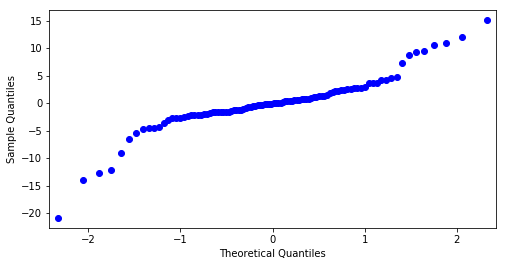

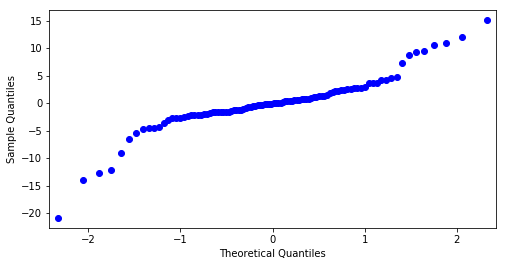

In [43]:
fig, ax = plt.subplots(figsize=(8, 4))
smg.qqplot(result.resid, ax=ax)

In [44]:
model = smf.ols("y ~ x1 + x2 + x1*x2", data)
In [70]: result = model.fit()
In [71]: print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     9759.
Date:                Tue, 20 Oct 2020   Prob (F-statistic):          3.83e-119
Time:                        08:20:36   Log-Likelihood:                -56.852
No. Observations:                 100   AIC:                             121.7
Df Residuals:                      96   BIC:                             132.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9753      0.044     22.170      0.0

In [45]:
result.rsquared

0.996731782202139

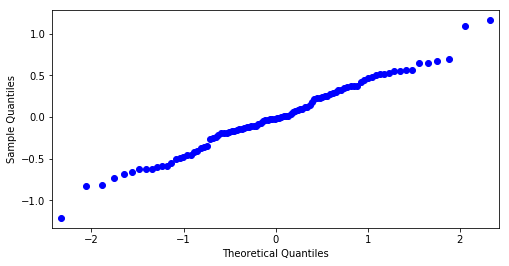

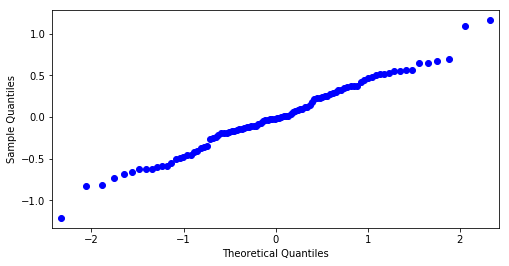

In [48]:
z, p = stats.normaltest(result.fittedvalues.values)
p
fig, ax = plt.subplots(figsize=(8, 4))
smg.qqplot(result.resid, ax=ax)

In [49]:
result.params

Intercept    0.975321
x1           1.907259
x2           2.978172
x1:x2        3.978420
dtype: float64

In [50]:
x = np.linspace(-1, 1, 50)
In [78]: X1, X2 = np.meshgrid(x, x)
In [79]: new_data = pd.DataFrame({"x1": X1.ravel(), "x2": X2.ravel()})

In [51]:
y_pred = result.predict(new_data)
y_pred.shape
y_pred = y_pred.values.reshape(50, 50)

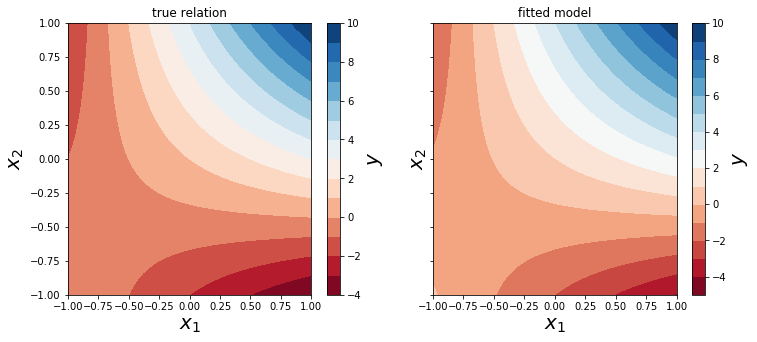

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
 ...: def plot_y_contour(ax, Y, title):
        c = ax.contourf(X1, X2, Y, 15, cmap=plt.cm.RdBu)
        ax.set_xlabel(r"$x_1$", fontsize=20)
        ax.set_ylabel(r"$x_2$", fontsize=20)
        ax.set_title(title)
        cb = fig.colorbar(c, ax=ax)
        cb.set_label(r"$y$", fontsize=20)
 ...:
 ...: plot_y_contour(axes[0], y_true(X1, X2), "true relation")
 ...: plot_y_contour(axes[1], y_pred, "fitted model")

In [55]:
dataset = sm.datasets.get_rdataset("Icecream", "Ecdat")
dataset.title

'Ice Cream Consumption'

In [57]:
 dataset.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
cons      30 non-null float64
income    30 non-null int64
price     30 non-null float64
temp      30 non-null int64
dtypes: float64(2), int64(2)
memory usage: 1.0 KB


In [56]:
model = smf.ols("cons ~ -1 + price + temp", data=dataset.data)
In [88]: result = model.fit()

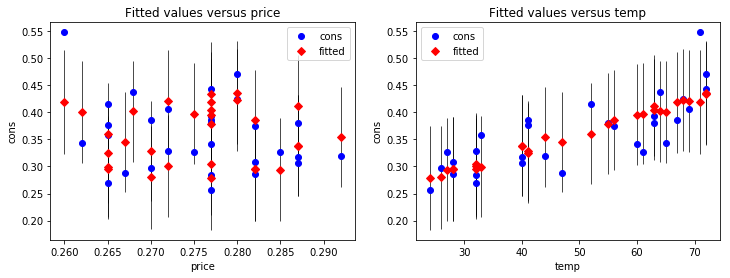

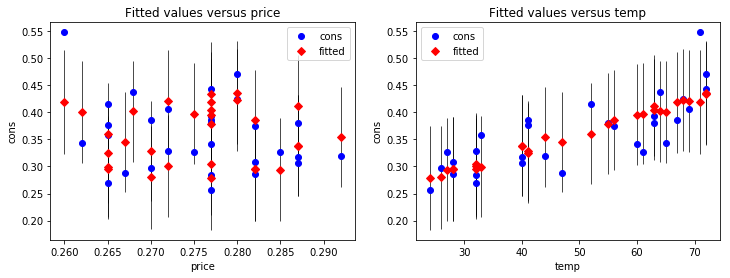

In [58]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
 ...: smg.plot_fit(result, 0, ax=ax1)
 ...: smg.plot_fit(result, 1, ax=ax2)

In [59]:
df = sm.datasets.get_rdataset("iris").data
In [91]: df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal.Length    150 non-null float64
Sepal.Width     150 non-null float64
Petal.Length    150 non-null float64
Petal.Width     150 non-null float64
Species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [60]:
 df.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [61]:
df_subset = df[df.Species.isin(["versicolor", "virginica"])].copy()

In [62]:
df_subset.Species = df_subset.Species.map({"versicolor": 1, "virginica": 0})

In [63]:
df_subset.rename(columns={"Sepal.Length": "Sepal_Length",
 ...: "Sepal.Width": "Sepal_Width",
 ...: "Petal.Length": "Petal_Length",
 ...: "Petal.Width": "Petal_Width"}, inplace=True)

In [64]:
df_subset.head(3)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1


In [66]:
 model = smf.logit("Species ~ Petal_Length + Petal_Width", data=df_subset)

In [67]:
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.102818
         Iterations 10


In [68]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                Species   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Tue, 20 Oct 2020   Pseudo R-squ.:                  0.8517
Time:                        08:26:33   Log-Likelihood:                -10.282
converged:                       True   LL-Null:                       -69.315
                                        LLR p-value:                 2.303e-26
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       45.2723     13.612      3.326      0.001      18.594      71.951
Petal_Length    -5.7545      2.306     -2.496      0.013     -10.274      -1.235
Petal_Width    -10.4467      3.756     -2.78

In [69]:
 print(result.get_margeff().summary())


        Logit Marginal Effects       
Dep. Variable:                Species
Method:                          dydx
At:                           overall
                  dy/dx    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Petal_Length    -0.1736      0.052     -3.347      0.001      -0.275      -0.072
Petal_Width     -0.3151      0.068     -4.608      0.000      -0.449      -0.181


In [70]:
 df_new = pd.DataFrame({"Petal_Length": np.random.randn(20)*0.5 + 5, "Petal_Width": np.random.randn(20)*0.5 + 1.7})
df_new["P-Species"] = result.predict(df_new)

In [71]:
 df_new["P-Species"].head(3)

0    0.436073
1    0.480647
2    0.672642
Name: P-Species, dtype: float64

In [72]:
df_new["Species"] = (df_new["P-Species"] > 0.5).astype(int)

In [73]:
params = result.params
alpha0 = -params['Intercept']/params['Petal_Width']
alpha1 = -params['Petal_Length']/params['Petal_Width']

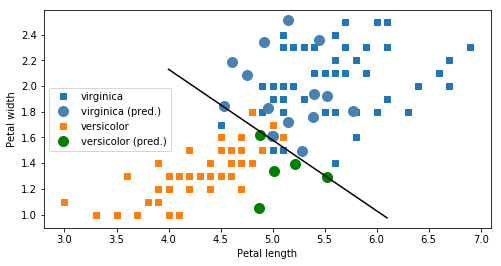

In [74]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
 ...: # species virginica
ax.plot(df_subset[df_subset.Species == 0].Petal_Length.values, df_subset[df_subset.Species == 0].Petal_Width.values, 's', label='virginica')
 ...: ax.plot(df_new[df_new.Species == 0].Petal_Length.values,
 ...: df_new[df_new.Species == 0].Petal_Width.values,
 ...: 'o', markersize=10, color="steelblue", label='virginica (pred.)')
 ...:
 ...: # species versicolor
 ...: ax.plot(df_subset[df_subset.Species == 1].Petal_Length.values,
 ...: df_subset[df_subset.Species == 1].Petal_Width.values, 's', label='versicolor')
 ...: ax.plot(df_new[df_new.Species == 1].Petal_Length.values,
 ...: df_new[df_new.Species == 1].Petal_Width.values,
 ...: 'o', markersize=10, color="green", label='versicolor (pred.)')
 ...:
 ...: # boundary line
 ...: _x = np.array([4.0, 6.1])
 ...: ax.plot(_x, alpha0 + alpha1 * _x, 'k')
 ...: ax.set_xlabel('Petal length')
 ...: ax.set_ylabel('Petal width')
 ...: ax.legend()

In [111]:
dataset = sm.datasets.get_rdataset("discoveries")

URLError: <urlopen error timed out>

In [94]:
df = dataset.data.set_index("time").rename(columns={"values": "discoveries"})
df.head(10).T

time,1860,1861,1862,1863,1864,1865,1866,1867,1868,1869
value,5,3,0,2,0,3,2,3,6,1


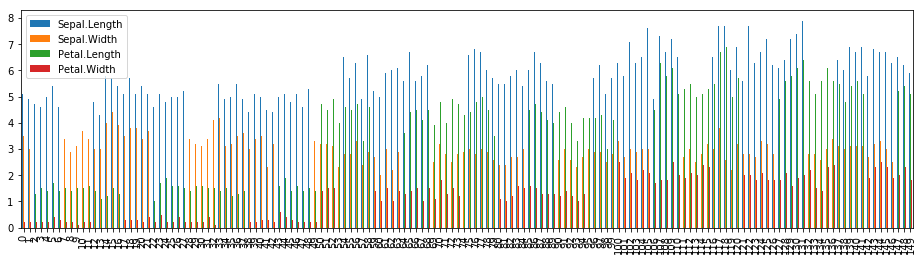

In [87]:
fig, ax = plt.subplots(1, 1, figsize=(16, 4))
df.plot(kind='bar', ax=ax)

In [112]:
# model = smf.poisson("discoveries ~ 1", data=df)
#result = model.fit()

In [97]:
X_ci_l = stats.poisson(np.exp(result.conf_int().values)[0, 0])
X_ci_u = stats.poisson(np.exp(result.conf_int().values)[0, 1])

D:\aaaaaaa\lib\site-packages\ipykernel_launcher.py:1: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  """Entry point for launching an IPython kernel.


AttributeError: 'DataFrame' object has no attribute 'pmf'

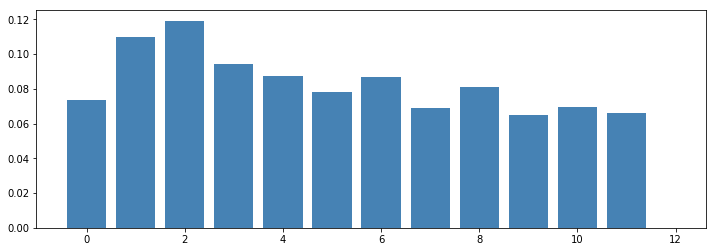

In [116]:
v, k = np.histogram(df.values, bins=12, range=(0, 12), normed=True)
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.bar(k[:-1], v, color="steelblue", align='center', label='Discoveries per year')
ax.bar(k-0.125, X_ci_l.pmf(k), color="red", alpha=0.5, align='center', width=0.25,label='Poisson fit (CI, lower)')
ax.bar(k, X.pmf(k), color="green", align='center', width=0.5, label='Poisson fit')
ax.bar(k+0.125, X_ci_u.pmf(k), color="red", alpha=0.5, align='center', width=0.25,label='Poisson fit (CI, upper)')
ax.legend()

In [99]:
df = pd.read_csv("temperature_outdoor_2014.tsv", header=None, 
delimiter="\t", names=["time", "temp"])
df.time = pd.to_datetime(df.time, unit="s")
df = df.set_index("time").resample("H").mean()

In [100]:
df_march = df[df.index.month == 3]
In [122]: df_april = df[df.index.month == 4]

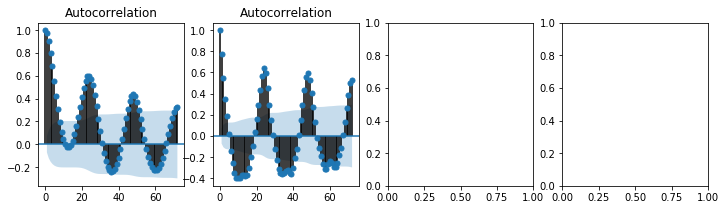

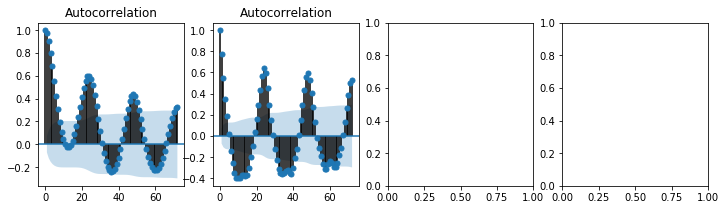

In [101]:
 fig, axes = plt.subplots(1, 4, figsize=(12, 3))
 ...: smg.tsa.plot_acf(df_march.temp, lags=72, ax=axes[0])
 ...: smg.tsa.plot_acf(df_march.temp.diff().dropna(), lags=72, 
ax=axes[1])

In [102]:
 smg.tsa.plot_acf(df_march.temp.diff().diff().dropna(), lags=72, 
ax=axes[2])
 ...: smg.tsa.plot_acf(df_march.temp.diff().diff().diff().dropna(), 
lags=72, ax=axes[3])

SyntaxError: illegal target for annotation (<ipython-input-102-0edbe24df69d>, line 3)

In [103]:
model = sm.tsa.AR(df_march.temp)

In [104]:
 result = model.fit(72)

In [105]:
sm.stats.durbin_watson(result.resid)

1.9985623006352946

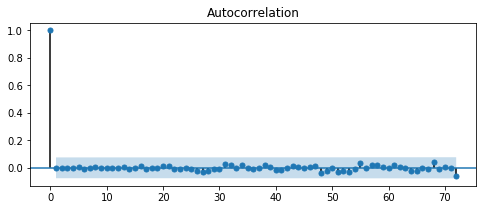

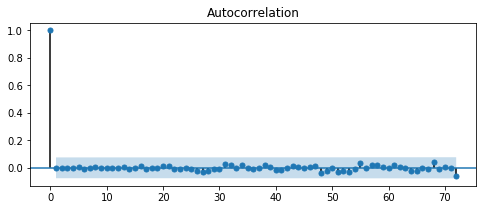

In [106]:
 fig, ax = plt.subplots(1, 1, figsize=(8, 3))
 ...: smg.tsa.plot_acf(result.resid, lags=72, ax=ax)

In [107]:
 temp_3d_forecast = result.predict("2014-04-01", "2014-04-4")

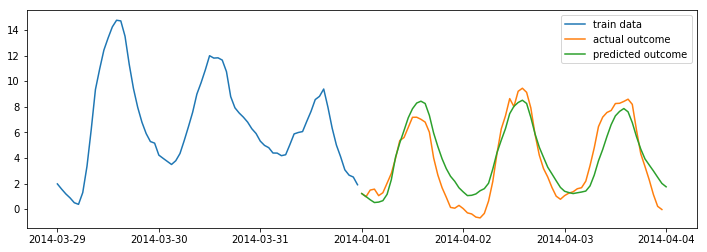

In [108]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
 ...: ax.plot(df_march.index.values[-72:], df_march.temp.values[-72:], 
label="train data")
 ...: ax.plot(df_april.index.values[:72], df_april.temp.values[:72], 
label="actual outcome")
 ...: ax.plot(pd.date_range("2014-04-01", "2014-04-4", freq="H").values, 
temp_3d_forecast, label="predicted outcome")
 ...:
 ...: ax.legend()